In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

In [21]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [22]:
train.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C
454,455,0,3,"Peduzzi, Mr. Joseph",male,NaN,0,0,A/5 2817,8.0500,NaN,S


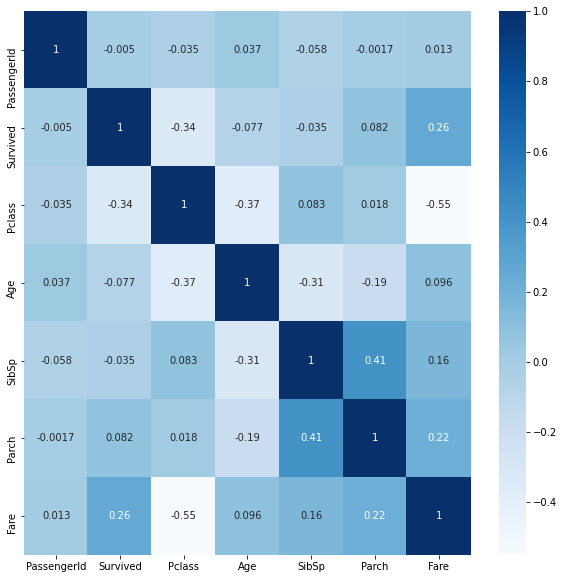

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, cmap="Blues")

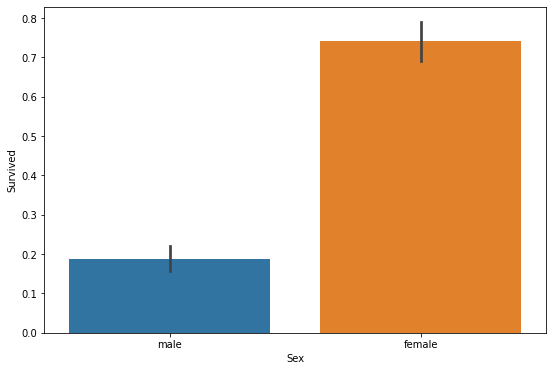

In [24]:
plt.figure(figsize=(9,6))
sns.barplot(x='Sex',y='Survived',data=train)

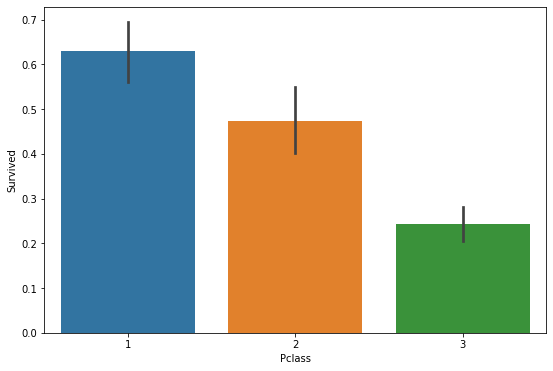

In [25]:
plt.figure(figsize=(9,6))
sns.barplot(x='Pclass', y='Survived', data=train)

In [26]:
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [27]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [28]:
imputer = SimpleImputer(strategy="median")

In [29]:
train_numerico = train.drop(['Sex','Embarked'], axis=1)
test_numerico = test.drop(['Sex','Embarked'], axis=1)

In [30]:
imputer.fit(train_numerico)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [31]:
train_no_null = imputer.transform(train_numerico)


In [32]:
imputer.fit(test_numerico)
test_no_null = imputer.transform(test_numerico)

In [33]:
train_tr = pd.DataFrame(train_no_null, columns=train_numerico.columns)
test_tr = pd.DataFrame(test_no_null, columns=test_numerico.columns)

In [35]:
train_tr.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [36]:
train_cat = train[['Sex', 'Embarked']]
test_cat = test[['Sex', 'Embarked']]

In [37]:
train_cat_encoded = pd.get_dummies(train_cat)
test_cat_encoded = pd.get_dummies(test_cat)

In [38]:
train_cat_encoded.head()


,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [39]:
new_train = train_tr.join(train_cat_encoded)
new_test = test_tr.join(test_cat_encoded)

In [40]:
new_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,0,1,0,0,1
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,1,0,1,0,0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,1,0,0,0,1
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,1,0,0,0,1
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,0,1,0,0,1


In [41]:
new_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892.0,3.0,34.5,0.0,0.0,7.8292,0,1,0,1,0
1,893.0,3.0,47.0,1.0,0.0,7.0000,1,0,0,0,1
2,894.0,2.0,62.0,0.0,0.0,9.6875,0,1,0,1,0
3,895.0,3.0,27.0,0.0,0.0,8.6625,0,1,0,0,1
4,896.0,3.0,22.0,1.0,1.0,12.2875,1,0,0,0,1


In [42]:


predictors = new_train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]

x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.2, random_state = 0)

In [71]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)

y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)


print(acc_decisiontree)

76.54


In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.36


In [73]:
ids = test['PassengerId']
predictions = gbk.predict(new_test.drop('PassengerId', axis=1))

In [74]:
submission = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions.astype('int64') })
submission.to_csv('submission.csv', index=False)